## <center> PyFinLib - Python for Finance Library </center>

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing PyFin:

In [293]:
import PyFinLib as pf
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Importing equities data:

In [359]:
tickers = ["BOVA11.SA","SMAL11.SA","USDBRL=X"]
equities = pf.get_yf_prices(tickers,start_date="2008-12-02")

#### Importing brazilian bonds indices:

In [361]:
imab = pf.get_imab_bcb(start_date="2008-12-02")
imag = pf.get_imag_bcb(start_date="2008-12-02")

#### Importing brazilian CDI data:

In [363]:
cdi = pf.get_cdi_bcb(start_date="2008-12-02")

In [365]:
data = pd.concat([equities,imab,imag],axis=1).fillna(method="ffill")
rets = data.pct_change(1)

#### Performance of each asset:

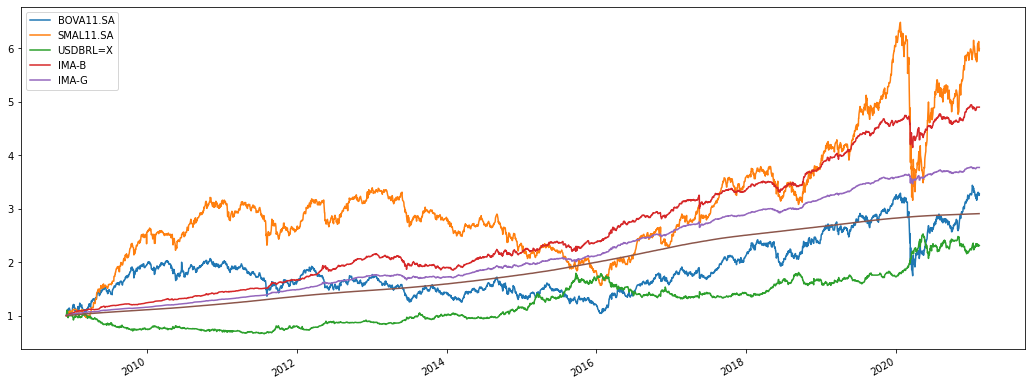

In [410]:
pf.performance_index(rets).plot(figsize=(18,7))
plt.plot(pf.performance_index(cdi))
plt.legend();

##### Annualized returns:

In [367]:
rets.dropna(inplace=True)

In [368]:
pf.annualized_rets(rets)

BOVA11.SA    0.102276
SMAL11.SA    0.158484
USDBRL=X     0.071308
IMA-B        0.139471
IMA-G        0.115236
dtype: float64

#### Annualized volatility:

In [369]:
pf.annualized_vol(rets)

BOVA11.SA    0.262148
SMAL11.SA    0.244587
USDBRL=X     0.175383
IMA-B        0.075017
IMA-G        0.035325
dtype: float64

#### Sharpe Ratio:

In [370]:
pf.sharpe_ratio(rets,rf=pf.annualized_rets(cdi["CDI"]).round(3))

BOVA11.SA    0.039200
SMAL11.SA    0.271819
USDBRL=X    -0.117983
IMA-B        0.632804
IMA-G        0.657793
dtype: float64

#### Underwater:

In [417]:
rets["BOVA11.SA"]

2008-12-03    0.008348
2008-12-04   -0.004865
2008-12-05    0.006204
2008-12-08    0.082799
2008-12-09   -0.008219
                ...   
2021-02-05    0.007043
2021-02-08   -0.008289
2021-02-09    0.002786
2021-02-10   -0.011981
2021-02-11    0.006503
Name: BOVA11.SA, Length: 3068, dtype: float64

In [419]:
pf.underwater(rets)

,BOVA11.SA,SMAL11.SA,USDBRL=X,IMA-B,IMA-G
2008-12-03,0.000000,0.000000,0.000000,0.000000,0.000000
2008-12-04,-0.004865,0.000000,0.000000,0.000000,0.000000
2008-12-05,0.000000,0.000000,0.000000,0.000000,0.000000
2008-12-08,0.000000,0.000000,-0.021434,0.000000,0.000000
2008-12-09,-0.008219,-0.003775,-0.051247,-0.000319,-0.000217
...,...,...,...,...,...
2021-02-05,-0.038040,-0.061963,-0.078265,-0.008939,-0.002722
2021-02-08,-0.046013,-0.055283,-0.087864,-0.008939,-0.002722
2021-02-09,-0.043355,-0.062849,-0.088696,-0.008939,-0.002722
2021-02-10,-0.054817,-0.082890,-0.086589,-0.008939,-0.002722


#### Plot Underwater:

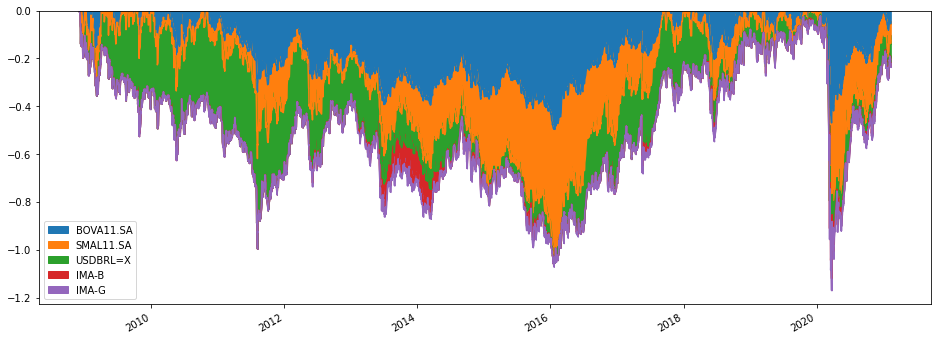

In [432]:
pf.plot_underwater(rets)

#### Maximum Drawdown: 

In [371]:
pf.max_drawdown(rets)

BOVA11.SA   -0.496547
SMAL11.SA   -0.537549
USDBRL=X    -0.402299
IMA-B       -0.141791
IMA-G       -0.057773
dtype: float64

#### Historical VaR:

In [372]:
rets

,BOVA11.SA,SMAL11.SA,USDBRL=X,IMA-B,IMA-G
2008-12-03,0.008348,-0.007984,0.007517,0.001477,0.001314
2008-12-04,-0.004865,0.009404,0.036367,0.001323,0.000836
2008-12-05,0.006204,0.010099,0.055620,0.005493,0.003327
2008-12-08,0.082799,0.038158,-0.021434,0.002932,0.001464
2008-12-09,-0.008219,-0.003775,-0.030466,-0.000319,-0.000217
...,...,...,...,...,...
2021-02-05,0.007043,0.002769,0.013771,0.000000,0.000000
2021-02-08,-0.008289,0.007122,-0.010413,0.000000,0.000000
2021-02-09,0.002786,-0.008009,-0.000913,0.000000,0.000000
2021-02-10,-0.011981,-0.021385,0.002312,0.000000,0.000000


In [373]:
pf.historical_var(rets,pct=0.01)

BOVA11.SA   -0.040832
SMAL11.SA   -0.040208
USDBRL=X    -0.029627
IMA-B       -0.012817
IMA-G       -0.005976
dtype: float64

#### Historical CVaR:

In [374]:
pf.historical_cvar(rets,pct=0.01)

BOVA11.SA   -0.036626
SMAL11.SA   -0.035393
USDBRL=X    -0.025500
IMA-B       -0.010949
IMA-G       -0.005058
dtype: float64

#### Gaussian VaR:

In [375]:
pf.gaussian_var(rets,pct=0.01)

BOVA11.SA   -0.037887
SMAL11.SA   -0.035134
USDBRL=X    -0.025363
IMA-B       -0.010462
IMA-G       -0.004740
dtype: float64

#### Modified gaussian VaR:

In [376]:
pf.modified_var(rets,pct=0.01)

BOVA11.SA   -0.075380
SMAL11.SA   -0.093005
USDBRL=X    -0.035495
IMA-B       -0.054928
IMA-G       -0.024489
dtype: float64

#### Normality - Check normality of returns:

In [377]:
pf.normality(rets)

BOVA11.SA    False
SMAL11.SA    False
USDBRL=X     False
IMA-B        False
IMA-G        False
dtype: bool

#### Kurtosis:

In [378]:
pf.kurtosis(rets)

BOVA11.SA    11.813622
SMAL11.SA    17.535348
USDBRL=X      7.415534
IMA-B        42.791843
IMA-G        41.282613
dtype: float64

#### Skewness:

In [379]:
pf.skewness(rets)

BOVA11.SA   -0.347921
SMAL11.SA   -0.933581
USDBRL=X     0.145667
IMA-B       -1.793603
IMA-G       -2.049671
dtype: float64

#### Summary statistics:

In [380]:
rets.dropna(inplace=True)
pf.main_stats(rets,rf=pf.annualized_rets(cdi["CDI"]).round(3))

,Annualized Return,Annualized Volatility,Sharpe Ratio (rf=0.092),Maximum Drawdown,Historical VaR (5.0%),Historical CVaR (5.0%),Gaussian VaR (5.0%),Modified VaR (5.0%),Kurtosis,Skewness,Normality
BOVA11.SA,0.102276,0.262148,0.039200,-0.496547,-0.024182,-0.036626,-0.026635,-0.025294,11.813622,-0.347921,False
SMAL11.SA,0.158484,0.244587,0.271819,-0.537549,-0.020927,-0.035393,-0.024635,-0.023952,17.535348,-0.933581,False
USDBRL=X,0.071308,0.175383,-0.117983,-0.402299,-0.017016,-0.025500,-0.017835,-0.016389,7.415534,0.145667,False
IMA-B,0.139471,0.075017,0.632804,-0.141791,-0.005729,-0.010949,-0.007242,-0.005571,42.791843,-1.793603,False
IMA-G,0.115236,0.035325,0.657793,-0.057773,-0.002578,-0.005058,-0.003224,-0.002626,41.282613,-2.049671,False


#### MInimize vol for a given return:

In [381]:
weights_target_20 = pf.target_ret_min_vol(cov_matrix,expected_returns,target=0.2)
pd.DataFrame(weights_target_20*100,index=cov_matrix.index,columns=["Weights"]).round(2)

,Weights
BOVA11.SA,0.0
SMAL11.SA,0.0
USDBRL=X,0.0
IMA-B,100.0
IMA-G,0.0


#### Monte Carlos Simulation Minimum Variance Frontier:

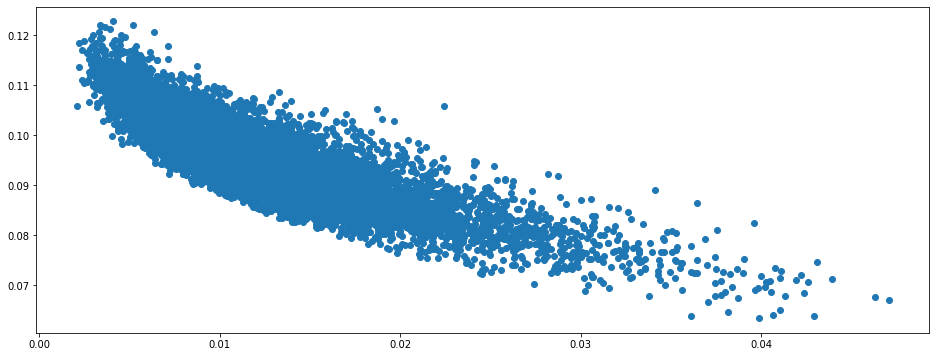

In [382]:
pf.plot_montecarlo_ef(cov_matrix,expected_returns,n_simulations=10000)

#### Optimized Minimum Variance Frontier:

In [383]:
expected_returns

BOVA11.SA    0.046217
SMAL11.SA    0.078742
USDBRL=X     0.108355
IMA-B        0.131722
IMA-G        0.112240
dtype: float64

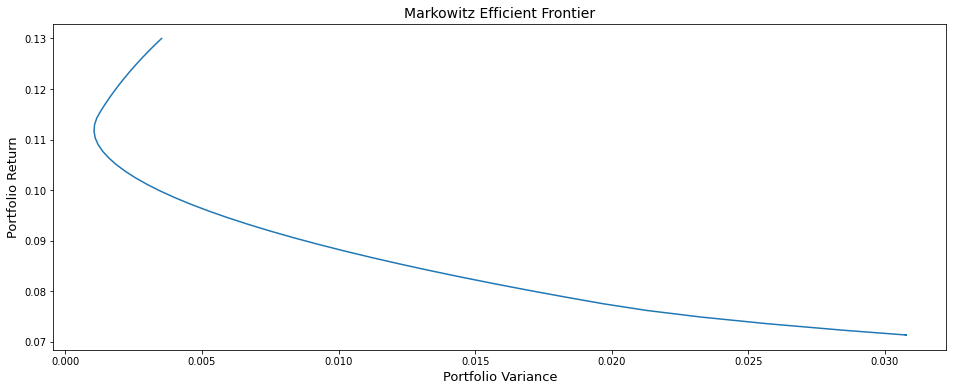

In [384]:
cov_matrix = rets.cov()
target_returns = np.linspace(0,0.13,100)
expected_returns = pf.annualized_rets(rets)
pf.plot_markowitz_ef(target_returns,cov_matrix,expected_returns)

#### Maximum Sharpe Ratio (MSR) Portfolio:

In [385]:
msr_weights = pf.msr_portfolio_weights(cov_matrix,expected_returns, rf=pf.annualized_rets(cdi["CDI"]))
pd.DataFrame(msr_weights*100,index=cov_matrix.index,columns=["Weights"]).round(2)

,Weights
BOVA11.SA,0.00
SMAL11.SA,0.08
USDBRL=X,1.11
IMA-B,0.00
IMA-G,98.81


##### Portfolio stats:

In [386]:
msr_stats = pf.portfolio_annualized_stats(msr_weights,cov_matrix,expected_returns,rf=pf.annualized_rets(cdi["CDI"]),name="MSR")
msr_stats

,Annualized Return,Annualized Volatility,Sharpe Ratio
MSR,0.114786,0.034594,0.662875


#### Global Minimum Variance Portfolio (GMV):

In [387]:
gmv_weights = pf.gmv_portfolio_weights(cov_matrix)
pd.DataFrame(gmv_weights*100,index=cov_matrix.index,columns=["Weights"]).round(2)

,Weights
BOVA11.SA,0.00
SMAL11.SA,0.00
USDBRL=X,7.71
IMA-B,0.00
IMA-G,92.29


##### Portfolio stats:

In [388]:
gmv_stats = pf.portfolio_annualized_stats(gmv_weights,cov_matrix,expected_returns,rf=pf.annualized_rets(cdi["CDI"]),name="GMV")
gmv_stats

,Annualized Return,Annualized Volatility,Sharpe Ratio
GMV,0.111849,0.032313,0.618813


#### Equally Weighted (EW) Portfolio:

In [389]:
ew_weights = pf.ew_weights(expected_returns.shape[0])
pd.DataFrame(ew_weights*100,index=cov_matrix.index,columns=["Weights"]).round(2)

,Weights
BOVA11.SA,20.0
SMAL11.SA,20.0
USDBRL=X,20.0
IMA-B,20.0
IMA-G,20.0


##### Portfolio stats:

In [390]:
ew_stats = pf.portfolio_annualized_stats(ew_weights,cov_matrix,expected_returns,rf=pf.annualized_rets(cdi["CDI"]),name="EW")
ew_stats

,Annualized Return,Annualized Volatility,Sharpe Ratio
EW,0.117355,0.103922,0.24539


#### Risk Parity (RP) Portfolio:

In [391]:
rp_weights = pf.rp_portfolio_weights(cov_matrix)
pd.DataFrame(rp_weights*100,index=cov_matrix.index,columns=["Weights"]).round(2)

,Weights
BOVA11.SA,6.51
SMAL11.SA,6.97
USDBRL=X,18.83
IMA-B,21.41
IMA-G,46.27


##### Portfolio stats:

In [392]:
rp_stats = pf.portfolio_annualized_stats(rp_weights,cov_matrix,expected_returns,rf=pf.annualized_rets(cdi["CDI"]),name="RP")
rp_stats

,Annualized Return,Annualized Volatility,Sharpe Ratio
RP,0.114321,0.055875,0.402107


##### Contribution to risk of each asset in the RP Portfolio:

In [393]:
pd.DataFrame(pf.contribution_to_risk(rp_weights,cov_matrix)*100,columns=["Risk Contribution"]).round(2)

,Risk Contribution
BOVA11.SA,19.99
SMAL11.SA,19.98
USDBRL=X,20.02
IMA-B,20.00
IMA-G,20.02


#### Portfolio Comparison: 

In [394]:
portfolios_stats = pd.concat([ew_stats,gmv_stats,msr_stats,rp_stats],axis=0)
portfolios_stats

,Annualized Return,Annualized Volatility,Sharpe Ratio
EW,0.117355,0.103922,0.245390
GMV,0.111849,0.032313,0.618813
MSR,0.114786,0.034594,0.662875
RP,0.114321,0.055875,0.402107


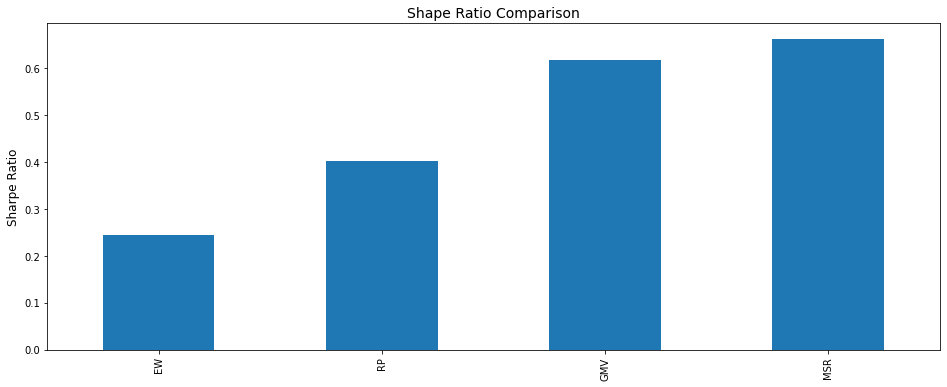

In [395]:
portfolios_stats["Sharpe Ratio"].sort_values().plot.bar(figsize=(16,6))
plt.ylabel("Sharpe Ratio",fontsize=12)
plt.title("Shape Ratio Comparison",fontsize=14);

#### In-sample analysis of portfolio performance:

In [396]:
ew_performance = pf.no_reb_strategy(rets,ew_weights)
rp_performance = pf.no_reb_strategy(rets,rp_weights)
msr_performance = pf.no_reb_strategy(rets,msr_weights)
gmv_performance = pf.no_reb_strategy(rets,gmv_weights)

df_portfolios = pd.concat([ew_performance,rp_performance,msr_performance,gmv_performance],axis=1)
df_portfolios.columns =["EW","RP","MSR","GMV"]
df_portfolios_rets = df_portfolios.pct_change().dropna()
df_portfolios

,EW,RP,MSR,GMV
2008-12-03,1.000000,1.000000,1.000000,1.000000
2008-12-04,1.008613,1.007858,1.001236,1.003576
2008-12-05,1.025181,1.022546,1.005173,1.011094
2008-12-08,1.045738,1.027555,1.006399,1.010643
2008-12-09,1.036526,1.020383,1.005819,1.007927
...,...,...,...,...
2021-02-05,4.078669,3.868524,3.753770,3.655769
2021-02-08,4.077151,3.865262,3.753539,3.653912
2021-02-09,4.068647,3.862008,3.753476,3.653751
2021-02-10,4.035665,3.851316,3.753427,3.654159


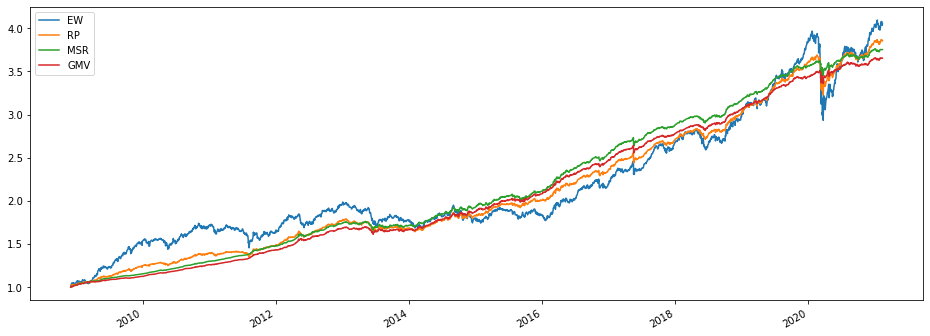

In [397]:
df_portfolios.plot(figsize=(16,6));

##### Portfolios stats:

In [398]:
pf.main_stats(df_portfolios_rets,rf=pf.annualized_rets(cdi["CDI"]))

,Annualized Return,Annualized Volatility,Sharpe Ratio (rf=0.0918536887804331),Maximum Drawdown,Historical VaR (5.0%),Historical CVaR (5.0%),Gaussian VaR (5.0%),Modified VaR (5.0%),Kurtosis,Skewness,Normality
EW,0.121778,0.114784,0.260701,-0.260462,-0.009973,-0.016517,-0.011409,-0.011398,16.967573,-1.060306,False
RP,0.117285,0.059552,0.427047,-0.125660,-0.004956,-0.008506,-0.005722,-0.005447,24.224281,-1.372692,False
MSR,0.114804,0.034911,0.657405,-0.056943,-0.002587,-0.004990,-0.003183,-0.002608,41.024469,-2.059388,False
GMV,0.112357,0.032909,0.623012,-0.051212,-0.002421,-0.004614,-0.002985,-0.002609,35.004119,-1.863461,False


#### Yearly Returns:

In [399]:
pf.rets_yearly_returns(df_portfolios_rets)

,EW,RP,MSR,GMV
2008,4.35,2.91,2.37,2.14
2009,46.79,21.08,12.60,10.05
2010,11.96,12.05,12.88,12.14
2011,-4.77,6.08,13.58,13.57
2012,19.87,19.49,17.69,17.35
2013,-9.04,-4.86,-1.36,-0.80
2014,1.16,8.88,12.34,12.51
2015,1.91,9.30,9.51,10.92
2016,19.62,17.65,20.69,18.79
2017,21.47,14.74,12.77,12.30


#### NEFIN Data (2001-01-02 to 2021-01-29):

In [400]:
pf.get_nefin_data()

,WML,HML,SMB,Rf,Rm-Rf
2001-01-02,-0.006308,0.065490,0.000524,0.000579,0.006601
2001-01-03,-0.028644,0.009390,0.005390,0.000577,0.062427
2001-01-04,-0.000946,-0.002327,0.006690,0.000574,-0.000310
2001-01-05,0.005985,-0.002397,0.003523,0.000573,-0.012839
2001-01-08,-0.004099,0.001948,0.007883,0.000573,0.003982
...,...,...,...,...,...
2021-01-22,0.004737,0.000523,-0.006062,0.000075,-0.009704
2021-01-26,-0.000980,-0.012009,-0.002526,0.000075,-0.009102
2021-01-27,-0.020807,0.010859,0.004380,0.000075,-0.005954
2021-01-28,-0.018209,0.003190,0.003113,0.000075,0.023221


#### Famma & French Data Names:

In [401]:
pf.get_fammafrench_names()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

#### Famma & French Data: 

In [402]:
pf.get_fammafrench_data('Portfolios_Formed_on_ME')

{0:           <= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  \
 Date                                                                      
 2016-02 -99.99  -0.07    1.29  -0.15  -0.59   0.41   1.63   0.88  -0.21   
 2016-03 -99.99   7.16    8.24   6.64   6.64   8.18   8.23   8.33   6.48   
 2016-04 -99.99   3.43    1.63   0.56   3.57   2.23   1.69   1.75   0.45   
 2016-05 -99.99   1.33    1.78   1.77   0.03   2.22   1.18   2.72   1.67   
 2016-06 -99.99   0.19   -0.69  -0.05  -0.45  -0.24  -0.55  -1.19   0.08   
 2016-07 -99.99   6.08    5.30   3.75   5.42   6.72   5.73   4.53   3.68   
 2016-08 -99.99   2.29    1.25   0.34   3.69   2.24   1.68   1.23   0.19   
 2016-09 -99.99   3.48    0.59   0.12   4.11   2.21   0.58   0.06   0.13   
 2016-10 -99.99  -5.90   -4.13  -1.64  -6.27  -6.31  -4.05  -2.16  -1.65   
 2016-11 -99.99  12.45   10.02   3.86  12.53  12.60  10.08   6.96   3.70   
 2016-12 -99.99   3.54    1.30   1.87   4.45   1.75   1.57   0.59   2.01   
 2017-01 

#### Momentum Weighted Portfolio:

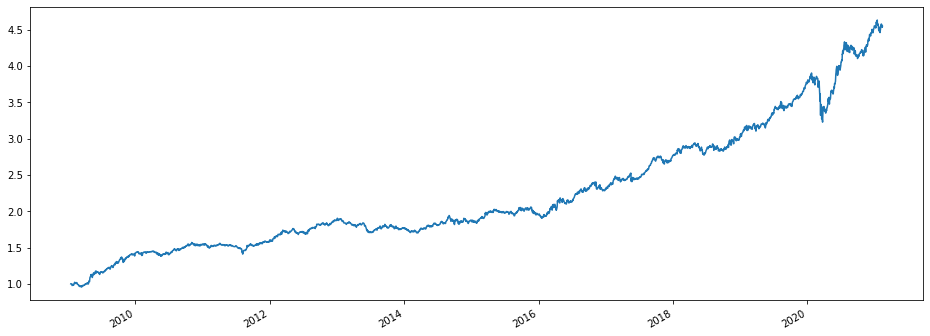

In [409]:
momentum_weighted_weights = pf.momentum_weighted_weights(rets,gamma=5,look_back_days=30,reb_days=30)
momentum_weighted_returns = pf.strategy_returns(rets,momentum_weighted_weights)
momentum_performance = pf.performance_index(momentum_weighted_returns)
momentum_performance.plot(figsize=(16,6));

##### Portfolio stats:

In [404]:
pf.main_stats(momentum_weighted_returns)

,Annualized Return,Annualized Volatility,Sharpe Ratio (rf=0),Maximum Drawdown,Historical VaR (5.0%),Historical CVaR (5.0%),Gaussian VaR (5.0%),Modified VaR (5.0%),Kurtosis,Skewness,Normality
stats,0.139987,0.098986,1.414211,-0.149814,-0.009301,-0.013985,-0.009715,-0.009636,9.096998,-0.398596,False


##### Yearly Returns:

In [405]:
pf.rets_yearly_returns(momentum_weighted_returns)

2008    -0.38
2009    40.13
2010     8.99
2011     0.66
2012    18.43
2013    -5.53
2014     5.17
2015     5.55
2016    21.69
2017    20.61
2018    14.64
2019    25.25
2020    21.88
2021     0.51
dtype: float64

#### Volatility Weighted Portfolio:

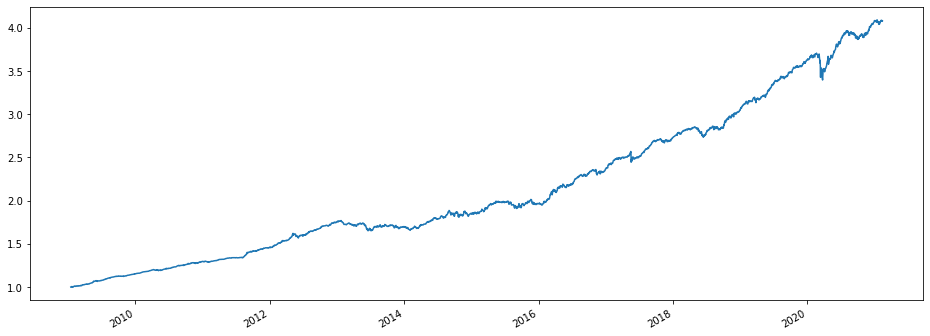

In [406]:
vol_weighted_weights = pf.vol_weighted_weights(rets,look_back_days=30,reb_days=30)
vol_weighted_returns = pf.strategy_returns(rets,vol_weighted_weights)
vol_performance = pf.performance_index(vol_weighted_returns)
vol_performance.plot(figsize=(16,6));

##### Portfolio stats:

In [407]:
pf.main_stats(vol_weighted_returns)

,Annualized Return,Annualized Volatility,Sharpe Ratio (rf=0),Maximum Drawdown,Historical VaR (5.0%),Historical CVaR (5.0%),Gaussian VaR (5.0%),Modified VaR (5.0%),Kurtosis,Skewness,Normality
stats,0.123698,0.052441,2.358812,-0.083764,-0.004369,-0.007543,-0.004964,-0.004609,26.271051,-1.403411,False


##### Yearly Returns:

In [408]:
pf.rets_yearly_returns(vol_weighted_returns)

2009    15.18
2010    12.56
2011    12.41
2012    20.06
2013    -2.84
2014     9.11
2015     5.93
2016    20.43
2017    15.21
2018    11.74
2019    19.06
2020    12.62
2021    -0.13
dtype: float64

#### FED Funds Data:

In [414]:
pf.get_fedfunds(start_date="2010-01-01",end_date="2021-01-01")

,Value
Date,
2010-01-01,0.11
2010-02-01,0.13
2010-03-01,0.16
2010-04-01,0.20
2010-05-01,0.20
...,...
2020-09-01,0.09
2020-10-01,0.09
2020-11-01,0.09
